Open training file and print first 5 rows of data

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_f20250362df648648ee81858c2a341b5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WpjIPTTCLB8aR9oMzbL1ZOs1t0q2PtRpYy3SLD4cjcT6',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f20250362df648648ee81858c2a341b5.get_object(Bucket='chapter9-donotdelete-pr-oef5e5dul7dtej',Key='WellTraining.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,lito_ID,lithofacies,GCR,NPHI,PE,PEF,ILD,ILM
0,1,Pkst/Pkst-Grnst,8,1.812,-2.309,1.116,3.187,5.615
1,2,Sucrosic (Dol),36,1.658,6.496,10.585,6.404,12.543
2,3,Pkst/Pkst-Grnst,5,5.530,3.265,0.078,6.514,1.917
3,4,NM Silt & Sand,4,-0.683,8.798,3.019,-5.334,14.279
4,5,Mar Shale & Silt,102,3.489,7.608,5.129,4.809,-1.541


Each row of the dataset represents one lithofacies as represented by several features that are in the table’s columns.
We have 180 lithofaciess and 8 features in the dataset:

In [4]:
print(df_data_1.shape)

(180, 8)


We have eight types of lithofacies in our dataset:

In [5]:
print(df_data_1['lithofacies'].unique())

['Pkst/Pkst-Grnst' 'Sucrosic (Dol)' 'NM Silt & Sand' 'Mar Shale & Silt'
 'Mdst/Mdst-Wkst' 'Grnst/PA Baff' 'Nm ShlySilt' 'Wkst/Wkst-Pkst']


The data is pretty balanced - between 22 to 25, with Mdst/Mdst-Wkst the most unbalnced with 16 

In [6]:
print(df_data_1.groupby('lithofacies').size())

lithofacies
Grnst/PA Baff       22
Mar Shale & Silt    23
Mdst/Mdst-Wkst      16
NM Silt & Sand      22
Nm ShlySilt         26
Pkst/Pkst-Grnst     23
Sucrosic (Dol)      23
Wkst/Wkst-Pkst      25
dtype: int64


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


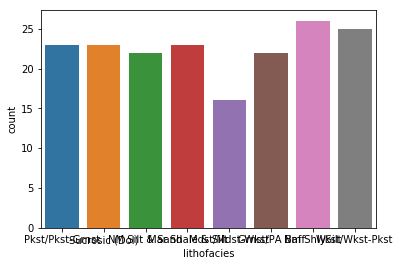

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(df_data_1['lithofacies'],label="Count")
plt.show()

seeing a Box plot for each numeric variable will give a better idea of the distribution of the input variables:

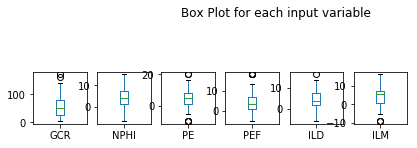

In [10]:
df_data_1.drop('lito_ID', axis=1).plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('lithofacies_box')
plt.show()

now try a histogram for each numeric input value

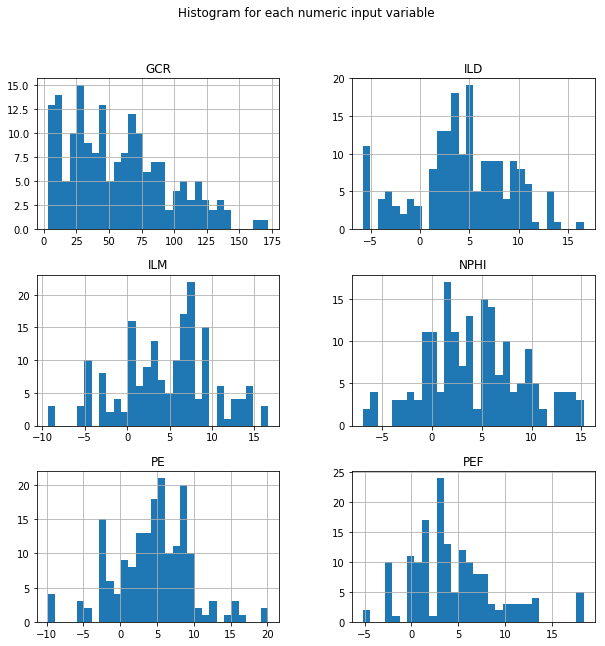

In [11]:
import pylab as pl
df_data_1.drop('lito_ID' ,axis=1).hist(bins=30, figsize=(10,10))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('lithofacies_hist')
plt.show()

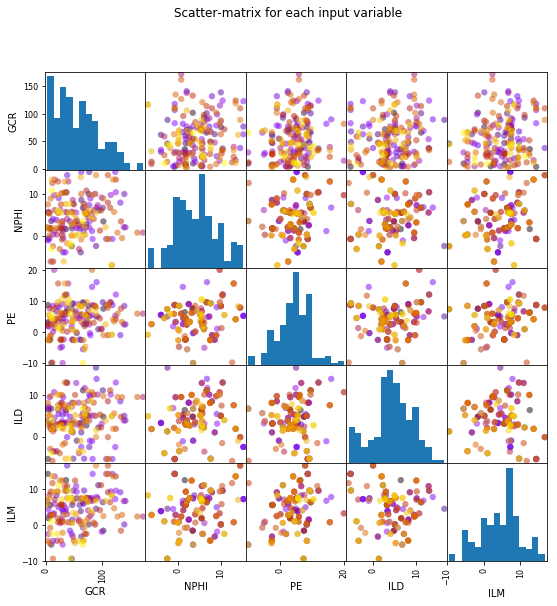

In [12]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = [ 'GCR', 'NPHI', 'PE', 'ILD', 'ILM']
X = df_data_1[feature_names]
y = df_data_1['lito_ID']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('lithofacies_scatter_matrix')

Create Training and Test Sets and Apply Scaling

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

build a Logistic Regression model

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.15
Accuracy of Logistic regression classifier on test set: 0.00


build a K-Nearest Neighbors model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.27
Accuracy of K-NN classifier on test set: 0.00


Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.99
Accuracy of GNB classifier on test set: 0.00


buid a Support Vector Machine model

In [25]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.00


Build a Decision Tree model

In [110]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print(clf)

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.00
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Requirement not upgraded as not directly required: graphviz in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages


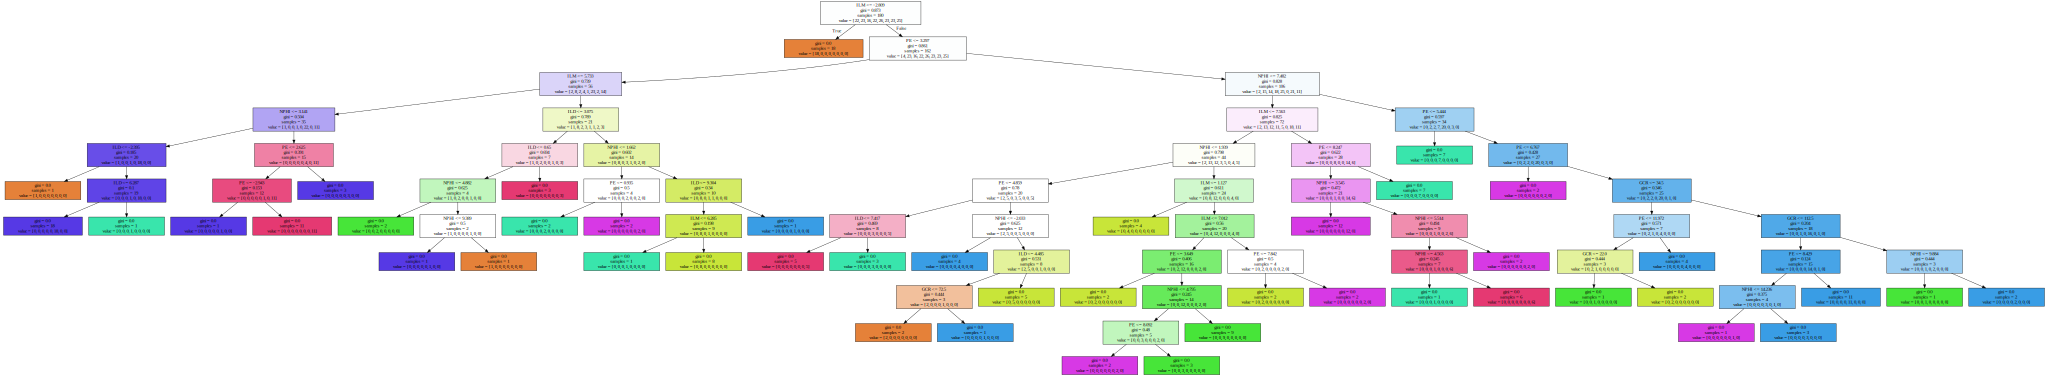

In [102]:
!pip install graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# feature matrix
feature_names = [ 'GCR', 'NPHI', 'PE', 'ILD', 'ILM']
X = df_data_1[feature_names]

# target vector
y = df_data_1['lithofacies']

# print dataset description
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels
   , filled = True))

display(SVG(graph.pipe(format='svg')))